<a href="https://colab.research.google.com/github/Prikat25/DL_636/blob/main/633003352_PriyankaReddyChukka_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 633003352_PriyankaReddy_Chukka_Project1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read Data
import pickle
from google.colab import files
files.upload()
!unzip -qq '636_project1.zip'
train_images = pickle.load(open('636_project1/636_project1_train_images', 'rb')) 
train_labels = pickle.load(open('636_project1/636_project1_train_labels', 'rb')) 
print(train_images.shape)
print(train_labels.shape)

Saving 636_project1.zip to 636_project1.zip
(60000, 28, 28)
(60000,)


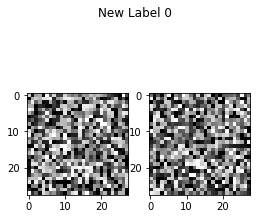

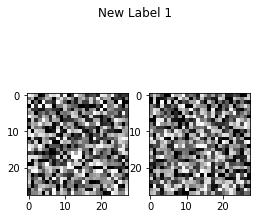

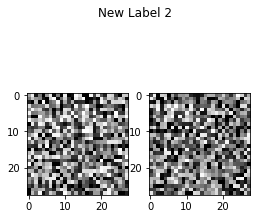

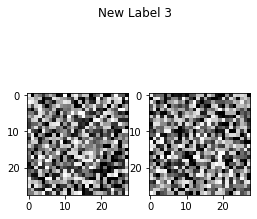

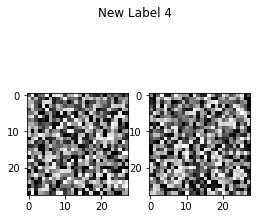

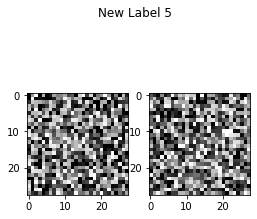

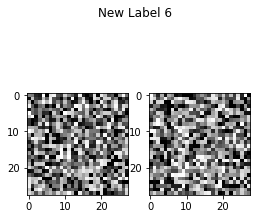

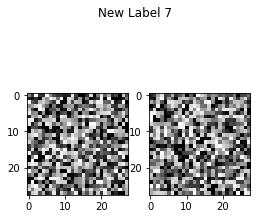

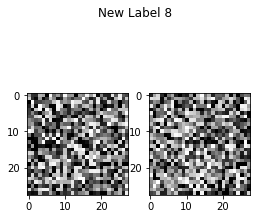

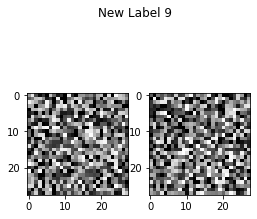

In [ ]:
# Iterate over the new labels and select 2 images for each label
plt.rcParams["figure.figsize"] = (4,4)
for i in range(10):
    fig, (ax1,ax2) = plt.subplots(1, 2)
    indices = np.where(train_labels == i)[0]
    idx = np.random.choice(indices, 2, replace=False)
    selected_images_0 = idx[0]
    selected_images_1 = idx[1]
    ax1.imshow(train_images[selected_images_0], cmap='gray')
    ax2.imshow(train_images[selected_images_1], cmap='gray')
    plt.suptitle(f'New Label {i}')
    plt.show();

In [ ]:
# Data pre-processing
train_images_arr = train_images.numpy()
train_labels_arr = train_labels.numpy()
train_images_arr = train_images_arr.reshape((len(train_images_arr), 28 * 28))
train_images_arr = train_images_arr.astype("float32") / 255
from sklearn.model_selection import train_test_split
# Split data into training and test set
train_images_n,test_images_n,train_labels_n,test_labels_n = train_test_split(train_images_arr,train_labels_arr,test_size=0.002, random_state=42)
print(train_images_n.shape)
print(train_labels_n.shape)
print(test_images_n.shape)
print(test_labels_n.shape)

(59880, 784)
(59880,)
(120, 784)
(120,)


In [ ]:
# Initial Model Building, Compiling and Training
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
              filepath="initial_model.keras",
              save_best_only=True,
              monitor="val_loss"),
              keras.callbacks.EarlyStopping(monitor="val_loss", 
              mode="min", 
              patience=10)]
history = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
print('\n Training Accuracy: ', np.mean(history.history['accuracy']))
print('\n Training Loss: ', np.mean(history.history['loss']))
print('\n Validation Accuracy: ', np.median(history.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history.history['val_loss']))


 Training Accuracy:  0.30899227112531663

 Training Loss:  1.9690435218811035

 Validation Accuracy:  0.2594076991081238

 Validation Loss:  2.119684934616089


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


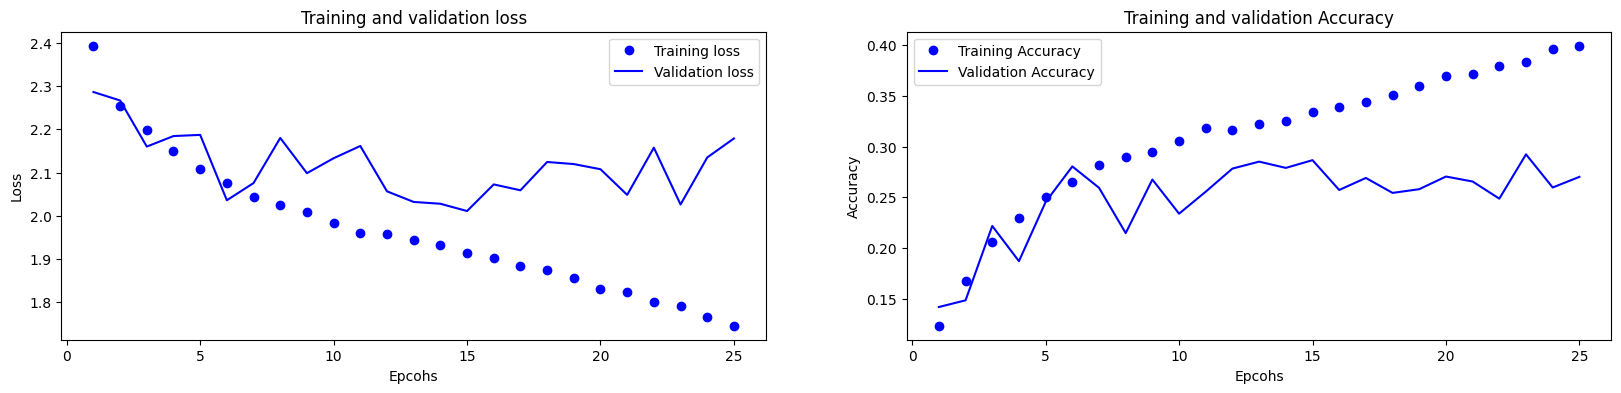

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.legend(loc=2, fontsize=3)
plt.rcParams["figure.figsize"] = (20,4)
loss_values = history.history["loss"]
val_loss_values = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, loss_values, "bo", label="Training loss")
ax1.plot(epochs, val_loss_values, "b", label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, acc, "bo", label="Training Accuracy")
ax2.plot(epochs, val_acc, "b", label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();


 Optimizer :  sgd

 Training Accuracy:  0.3022857305958219

 Training Loss:  1.980289048474768

 Validation Accuracy:  0.28609997034072876

 Validation Loss:  2.005572199821472

 Optimizer :  rmsprop

 Training Accuracy:  0.3077850940823555

 Training Loss:  1.9684847784042359

 Validation Accuracy:  0.2530060112476349

 Validation Loss:  2.1200196743011475

 Optimizer :  adam

 Training Accuracy:  0.3375259284910403

 Training Loss:  1.8837458208987587

 Validation Accuracy:  0.30366289615631104

 Validation Loss:  1.9784873723983765


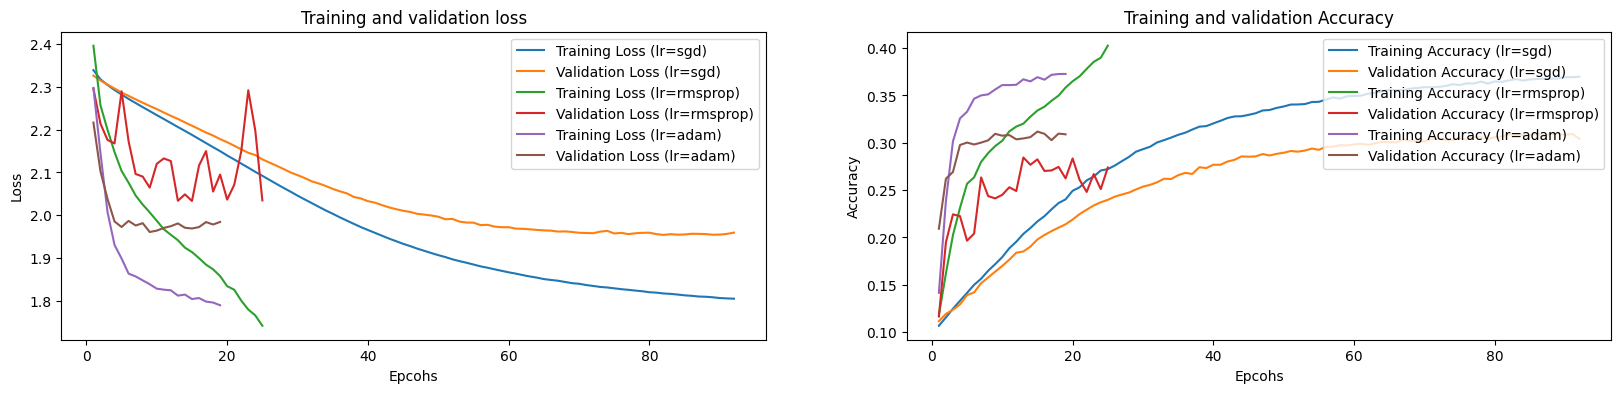

In [ ]:
# Tuning with different optimizers
optimizers = ['sgd', 'rmsprop', 'adam']
fig, (ax1,ax2) = plt.subplots(1, 2)
for optimizer in optimizers:
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
    history_opt = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
    epochs = range(1, len(history_opt.history["loss"]) + 1)
    print('\n Optimizer : ', optimizer)
    print('\n Training Accuracy: ', np.mean(history_opt.history['accuracy']))
    print('\n Training Loss: ', np.mean(history_opt.history['loss']))
    print('\n Validation Accuracy: ', np.median(history_opt.history['val_accuracy']))
    print('\n Validation Loss: ', np.median(history_opt.history['val_loss']))
  # plot the training and validation accuracy
    ax1.plot(epochs, history_opt.history['loss'], label='Training Loss (lr={})'.format(optimizer))
    ax1.plot(epochs, history_opt.history['val_loss'], label='Validation Loss (lr={})'.format(optimizer))
    ax2.plot(epochs, history_opt.history['accuracy'], label='Training Accuracy (lr={})'.format(optimizer))
    ax2.plot(epochs, history_opt.history['val_accuracy'], label='Validation Accuracy (lr={})'.format(optimizer))
# set the title and labels
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend(loc="upper right")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend(loc="upper right")
plt.show();

Observations: RMSProp seems to better than other two in terms of training the data faster and also in reducing the validation loss


 Learning Rate :  1e-05

 Training Accuracy:  0.3244531521187076

 Training Loss:  1.9377728059606731

 Validation Accuracy:  0.29965487122535706

 Validation Loss:  1.9875359535217285

 Learning Rate :  0.0001

 Training Accuracy:  0.3376015431713313

 Training Loss:  1.8958002105355263

 Validation Accuracy:  0.30511023104190826

 Validation Loss:  1.9685628414154053

 Learning Rate :  0.001

 Training Accuracy:  0.3433149936406509

 Training Loss:  1.8686921233716218

 Validation Accuracy:  0.30266088247299194

 Validation Loss:  1.9840736389160156

 Learning Rate :  0.01

 Training Accuracy:  0.11150506368050209

 Training Loss:  2.3848597819988546

 Validation Accuracy:  0.10932976752519608

 Validation Loss:  2.301727056503296


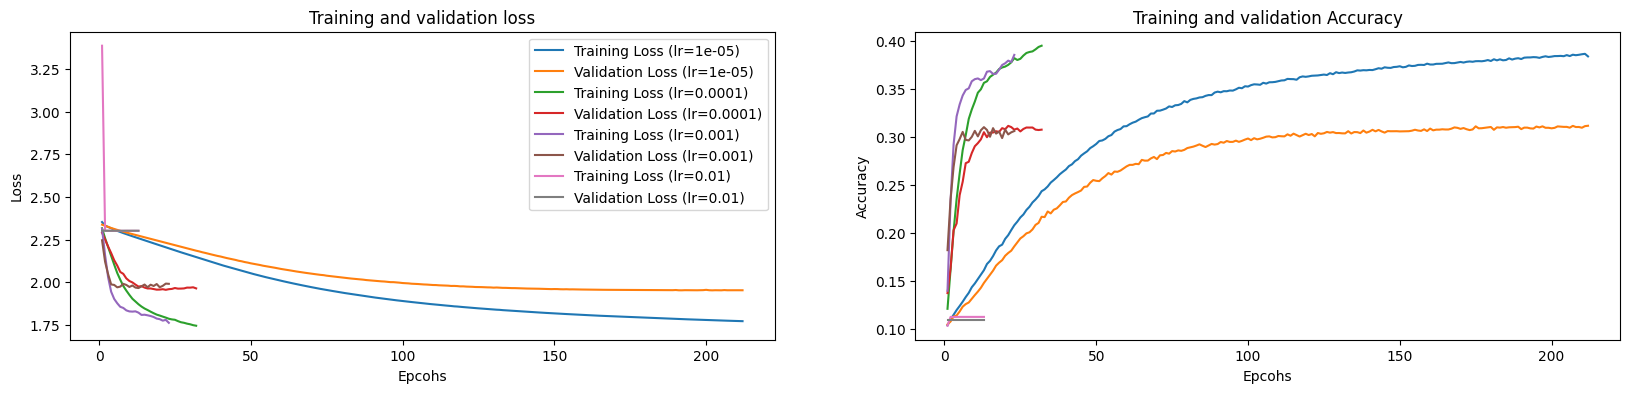

In [ ]:
# Tuning with different learning rates
learning_rates = [1e-5, 0.0001, 0.001, 0.01]
fig, (ax1,ax2) = plt.subplots(1, 2)
for learning_rate in learning_rates:
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
    history_lr = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
    epochs = range(1, len(history_lr.history["loss"]) + 1)
    print('\n Learning Rate : ', learning_rate)
    print('\n Training Accuracy: ', np.mean(history_lr.history['accuracy']))
    print('\n Training Loss: ', np.mean(history_lr.history['loss']))
    print('\n Validation Accuracy: ', np.median(history_lr.history['val_accuracy']))
    print('\n Validation Loss: ', np.median(history_lr.history['val_loss']))
  # plot the training and validation accuracy
    ax1.plot(epochs, history_lr.history['loss'], label='Training Loss (lr={})'.format(learning_rate))
    ax1.plot(epochs, history_lr.history['val_loss'], label='Validation Loss (lr={})'.format(learning_rate))
    ax2.plot(epochs, history_lr.history['accuracy'], label='Training Accuracy (lr={})'.format(learning_rate))
    ax2.plot(epochs, history_lr.history['val_accuracy'], label='Validation Accuracy (lr={})'.format(learning_rate))
# set the title and labels
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend(loc="upper right")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
# ax2.legend(loc="lower left")
plt.show();

Observations: 0.0001 seems to be better fit in terms of acheiving a good training accuracy and also reducing val_loss


 Layers :  1

 Training Accuracy:  0.3460485967429909

 Training Loss:  1.8766031941852055

 Validation Accuracy:  0.3066132366657257

 Validation Loss:  1.9686987400054932

 Layers :  2

 Training Accuracy:  0.3343603291681835

 Training Loss:  1.893194703828721

 Validation Accuracy:  0.29893118143081665

 Validation Loss:  1.983823537826538

 Layers :  3

 Training Accuracy:  0.3505821157442896

 Training Loss:  1.8431219427209151

 Validation Accuracy:  0.2926965057849884

 Validation Loss:  2.017324209213257


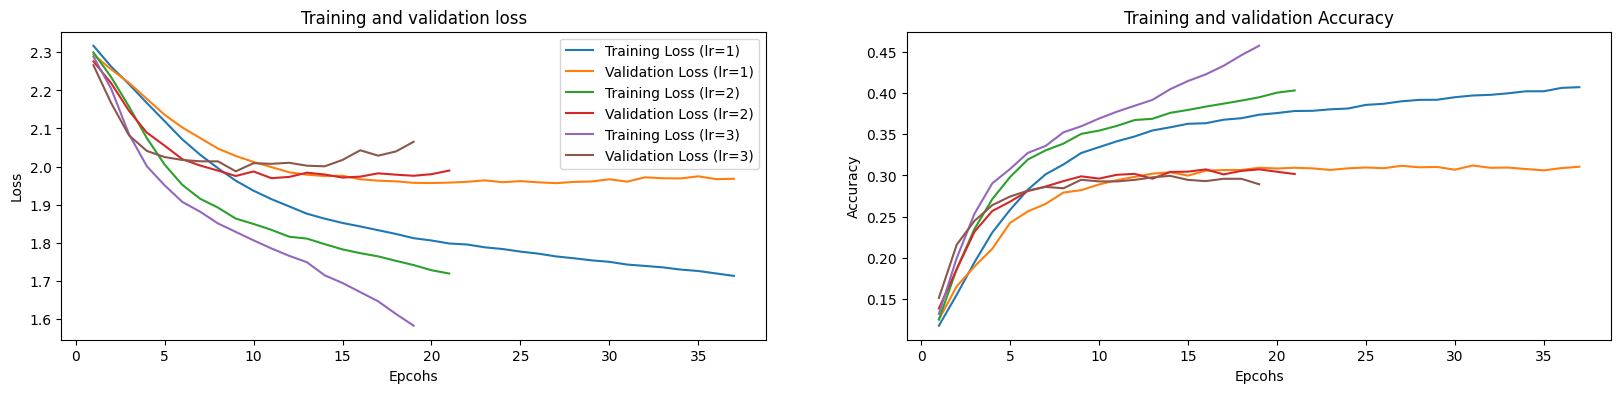

In [ ]:
# define model architecture with hidden layers for size 512
from keras.layers import Dense
layers = {1: [512], 2: [512, 512], 3:[512, 512, 512, 512]}
fig, (ax1,ax2) = plt.subplots(1, 2)
for size in list(layers.keys()):
    model = keras.Sequential()
    layer_n = layers[size]
    for i in range(0, len(layer_n)):
        neurons = layer_n[i]
        if neurons != 0:
            model.add(Dense(neurons, activation='relu'))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_l = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
    epochs = range(1, len(history_l.history["loss"]) + 1)
    print('\n Layers : ', size)
    print('\n Training Accuracy: ', np.mean(history_l.history['accuracy']))
    print('\n Training Loss: ', np.mean(history_l.history['loss']))
    print('\n Validation Accuracy: ', np.median(history_l.history['val_accuracy']))
    print('\n Validation Loss: ', np.median(history_l.history['val_loss']))
  # plot the training and validation accuracy
    ax1.plot(epochs, history_l.history['loss'], label='Training Loss (lr={})'.format(size))
    ax1.plot(epochs, history_l.history['val_loss'], label='Validation Loss (lr={})'.format(size))
    ax2.plot(epochs, history_l.history['accuracy'], label='Training Accuracy (lr={})'.format(size))
    ax2.plot(epochs, history_l.history['val_accuracy'], label='Validation Accuracy (lr={})'.format(size))
# set the title and labels
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend(loc="upper right")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
# ax2.legend(loc="lower left")
plt.show();

Observations for 512 size: Adding 1 hidden layer seems to be a better fit in terms of acheiving a good training accuracy and also reducing val_loss


 Layers :  16

 Training Accuracy:  0.27783611523253576

 Training Loss:  2.0046609674181255

 Validation Accuracy:  0.2852928191423416

 Validation Loss:  2.0133516788482666

 Layers :  32

 Training Accuracy:  0.290182700022482

 Training Loss:  1.9906760396865697

 Validation Accuracy:  0.280087947845459

 Validation Loss:  2.015179991722107

 Layers :  64

 Training Accuracy:  0.30454796210334106

 Training Loss:  1.9593357685449961

 Validation Accuracy:  0.29314184188842773

 Validation Loss:  1.9951971769332886

 Layers :  128

 Training Accuracy:  0.31616208649107386

 Training Loss:  1.9405461954219

 Validation Accuracy:  0.2954520136117935

 Validation Loss:  1.983763039112091

 Layers :  256

 Training Accuracy:  0.3219534332553546

 Training Loss:  1.930184190089886

 Validation Accuracy:  0.29553550481796265

 Validation Loss:  1.9813307523727417

 Layers :  512

 Training Accuracy:  0.33407738362438977

 Training Loss:  1.906555861234665

 Validation Accuracy:  0.305694

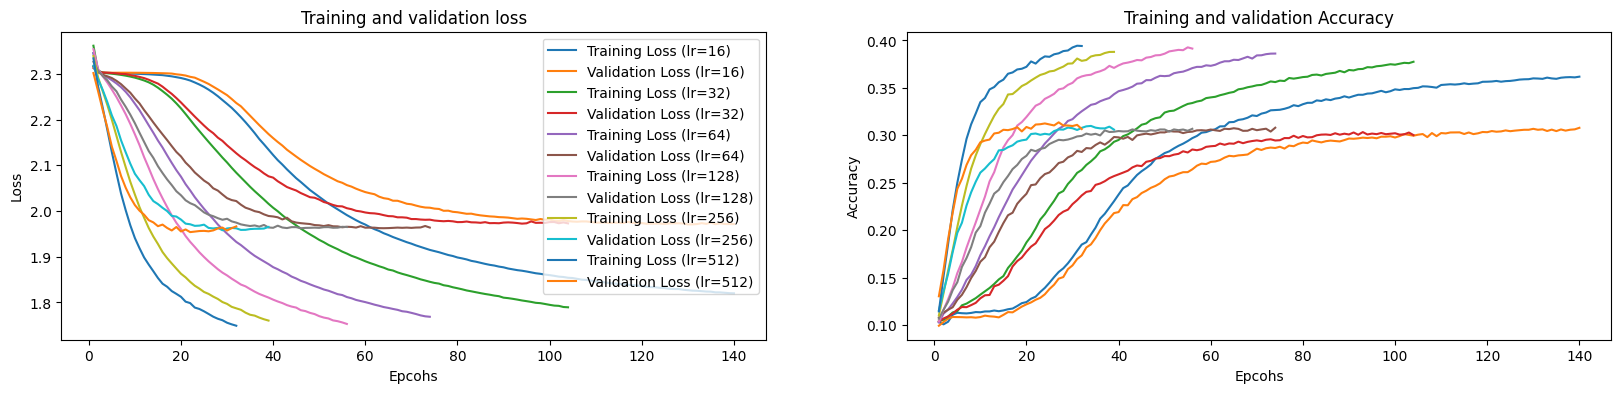

In [ ]:
# define model architecture with 2 layers for different sizes
sizes = [16, 32, 64, 128, 256, 512]
fig, (ax1,ax2) = plt.subplots(1, 2)
for size in sizes:
    model = keras.Sequential()
    model.add(Dense(size, activation='relu'))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_size = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
    epochs = range(1, len(history_size.history["loss"]) + 1)
    print('\n Layers : ', size)
    print('\n Training Accuracy: ', np.mean(history_size.history['accuracy']))
    print('\n Training Loss: ', np.mean(history_size.history['loss']))
    print('\n Validation Accuracy: ', np.median(history_size.history['val_accuracy']))
    print('\n Validation Loss: ', np.median(history_size.history['val_loss']))
  # plot the training and validation accuracy
    ax1.plot(epochs, history_size.history['loss'], label='Training Loss (lr={})'.format(size))
    ax1.plot(epochs, history_size.history['val_loss'], label='Validation Loss (lr={})'.format(size))
    ax2.plot(epochs, history_size.history['accuracy'], label='Training Accuracy (lr={})'.format(size))
    ax2.plot(epochs, history_size.history['val_accuracy'], label='Validation Accuracy (lr={})'.format(size))
# set the title and labels
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend(loc="upper right")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
# ax2.legend(loc="lower left")
plt.show();

Observations: 512 seems to be a good fit

In [ ]:
# Optimized Model Building, Compiling and Training
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_optimized = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)

# For all tries, model seems to be overfitting. Let's see if regularization will decrease the validation loss to zero

In [ ]:
# Regularize the model using L2
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_optreg = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)

In [ ]:
print('\n Training Accuracy: ', np.mean(history_optreg.history['accuracy']))
print('\n Training Loss: ', np.mean(history_optreg.history['loss']))
print('\n Validation Accuracy: ', np.median(history_optreg.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_optreg.history['val_loss']))


 Training Accuracy:  0.4009789563715458

 Training Loss:  1.9965557849632118

 Validation Accuracy:  0.3072533905506134

 Validation Loss:  2.1851338148117065


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


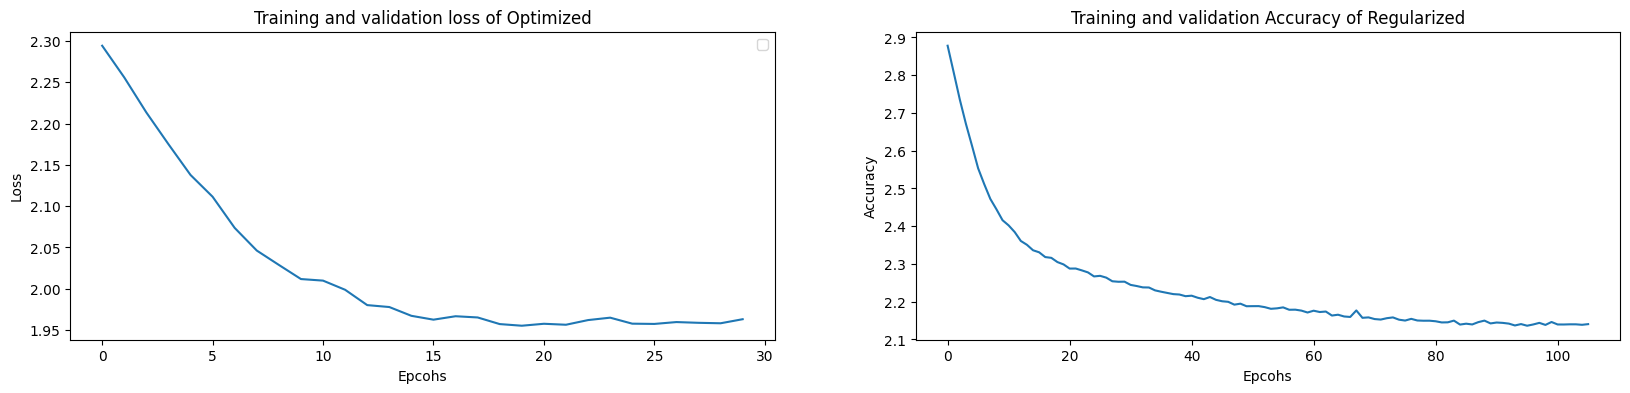

In [ ]:
# Plot Optimized and Regulrized loss to see if val_loss is reducing
fig, (ax1, ax2) = plt.subplots(1, 2)
epochs = range(1, len(history_optreg.history["loss"]) + 1)
ax1.plot(history_optimized.history["val_loss"])
ax2.plot(history_optreg.history["val_loss"])
ax1.set_title("Training and validation loss of Optimized")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend(loc="upper right")
ax2.set_title("Training and validation Accuracy of Regularized")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
plt.show();

Observations: Model with L2 regularization has done a better job at reducing val_loss and overfitting with same number of model parameters.


 Regs :  0.0005

 Training Accuracy:  0.3719983445036979

 Training Loss:  2.0146807072654602

 Validation Accuracy:  0.3072255551815033

 Validation Loss:  2.153078556060791

 Regs :  0.0002

 Training Accuracy:  0.3410279574907488

 Training Loss:  1.996462580230501

 Validation Accuracy:  0.3063070625066757

 Validation Loss:  2.0699456930160522

 Regs :  0.0001

 Training Accuracy:  0.34018308626753946

 Training Loss:  1.9480779239109585

 Validation Accuracy:  0.3046092092990875

 Validation Loss:  2.025416135787964

 Regs :  0.001

 Training Accuracy:  0.41309896425197

 Training Loss:  1.9645445033123619

 Validation Accuracy:  0.3048597276210785

 Validation Loss:  2.184573769569397

 Regs :  0.002

 Training Accuracy:  0.383430500720012

 Training Loss:  2.043500052670301

 Validation Accuracy:  0.30881206691265106

 Validation Loss:  2.126466989517212


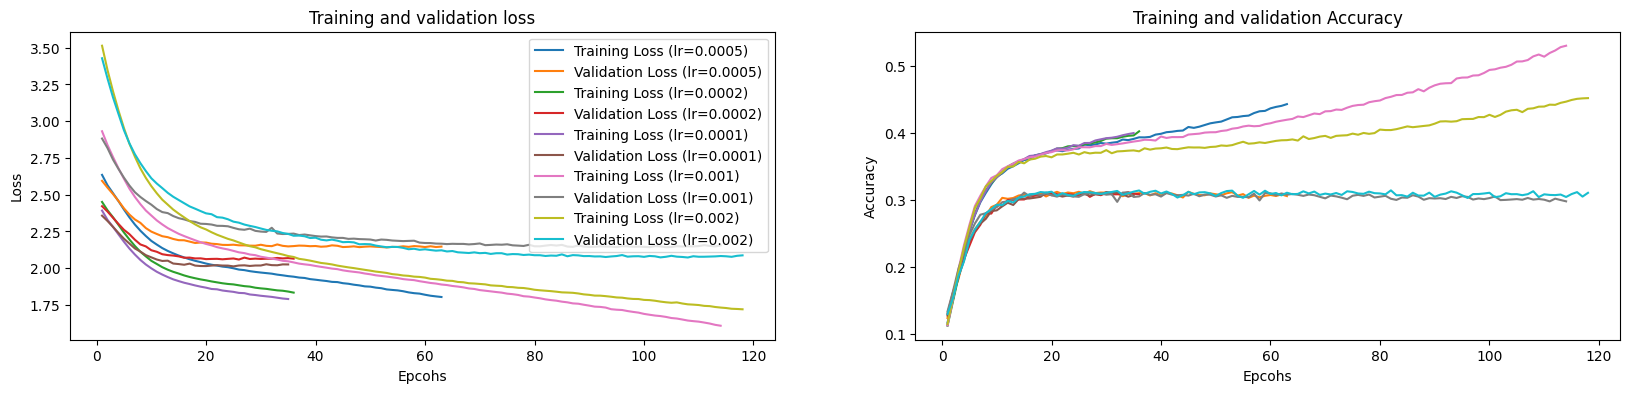

In [ ]:
# L2 regularization with different rates
regs = [0.0005, 0.0002, 0.0001, 0.001, 0.002]
fig, (ax1,ax2) = plt.subplots(1, 2)
for reg in regs:
    model = keras.Sequential()
    model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(reg)))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_rg1 = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
    epochs = range(1, len(history_rg1.history["loss"]) + 1)
    print('\n Regs : ', reg)
    print('\n Training Accuracy: ', np.mean(history_rg1.history['accuracy']))
    print('\n Training Loss: ', np.mean(history_rg1.history['loss']))
    print('\n Validation Accuracy: ', np.median(history_rg1.history['val_accuracy']))
    print('\n Validation Loss: ', np.median(history_rg1.history['val_loss']))
  # plot the training and validation accuracy
    ax1.plot(epochs, history_rg1.history['loss'], label='Training Loss (lr={})'.format(reg))
    ax1.plot(epochs, history_rg1.history['val_loss'], label='Validation Loss (lr={})'.format(reg))
    ax2.plot(epochs, history_rg1.history['accuracy'], label='Training Accuracy (lr={})'.format(reg))
    ax2.plot(epochs, history_rg1.history['val_accuracy'], label='Validation Accuracy (lr={})'.format(reg))
# set the title and labels
# ax1.plot(epochs, history.history['val_loss'], label='OG Validation Loss')
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend(loc="upper right")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
# ax2.legend(loc="lower left")
plt.show();

In [ ]:
# Optimized & Regularized Model Building, Compiling and Training
model = keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_optreg1 = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)

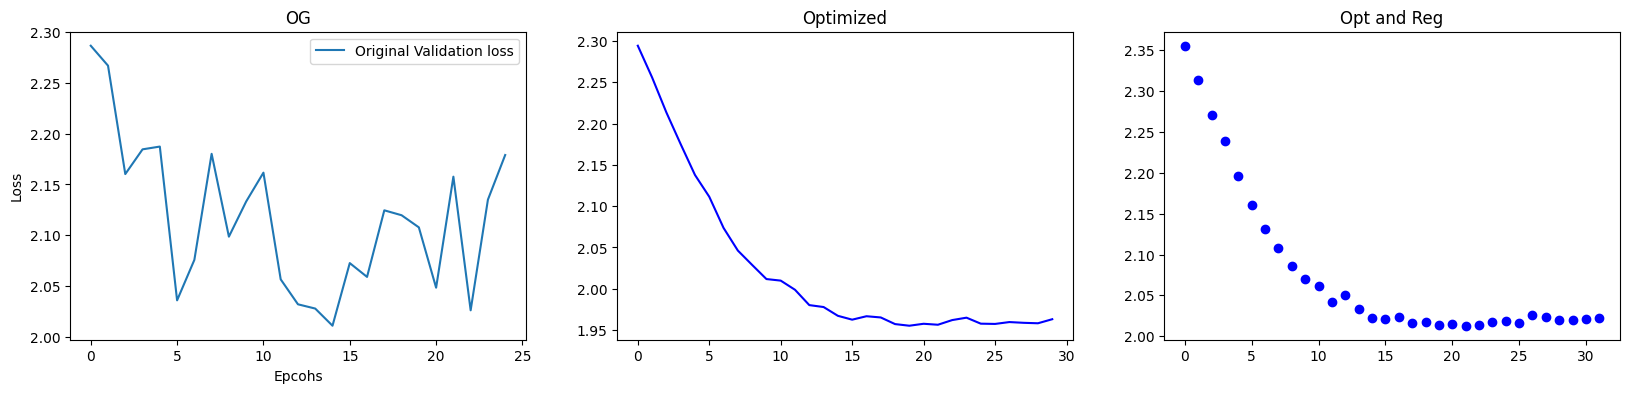

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(history.history["val_loss"], label="Original Validation loss")
ax2.plot(history_optimized.history["val_loss"], "b", label="Optimized Validation loss")
ax3.plot(history_optreg1.history["val_loss"], "bo", label="Regularized Validation loss")
ax1.set_title("OG")
ax2.set_title("Optimized")
ax3.set_title("Opt and Reg")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
plt.show();


 Dropout Layers :  0.5

 Training Accuracy:  0.30764420077736887

 Training Loss:  1.9509670925991875

 Validation Accuracy:  0.2998775243759155

 Validation Loss:  1.9803513288497925

 Dropout Layers :  0.3

 Training Accuracy:  0.32090149404004564

 Training Loss:  1.925566362780194

 Validation Accuracy:  0.3021598756313324

 Validation Loss:  1.9760353565216064

 Dropout Layers :  0.2

 Training Accuracy:  0.32680599223822354

 Training Loss:  1.9130665689706803

 Validation Accuracy:  0.3042195439338684

 Validation Loss:  1.9653908610343933

 Dropout Layers :  0.1

 Training Accuracy:  0.3252789822943283

 Training Loss:  1.92046493472475

 Validation Accuracy:  0.30338454246520996

 Validation Loss:  1.9723652601242065


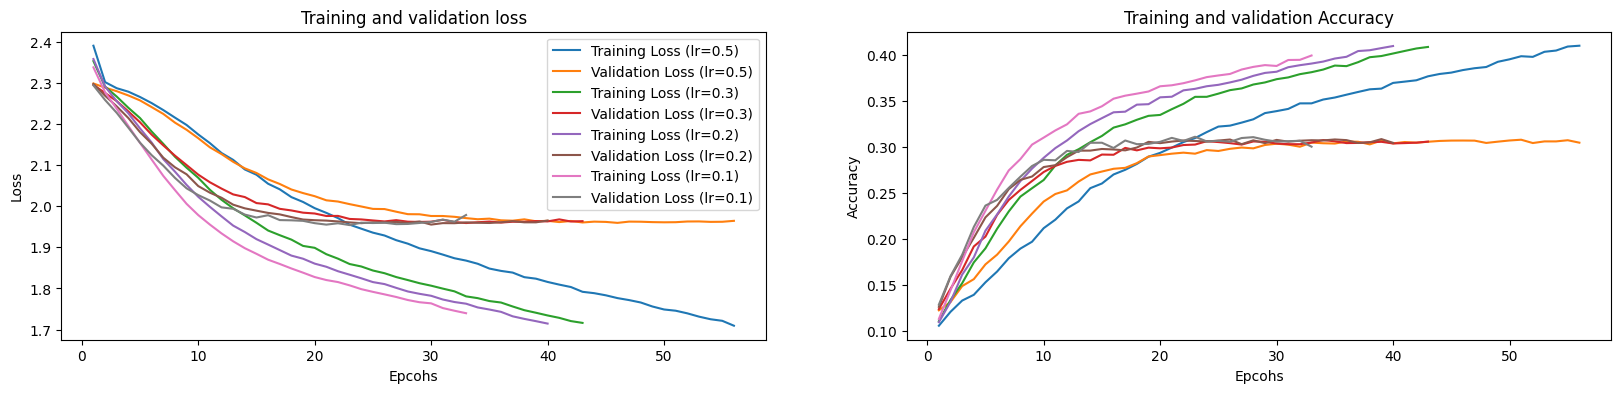

In [ ]:
# Dropout of 1 and 2 layers
dr = [0.5, 0.3, 0.2, 0.1]
fig, (ax1,ax2) = plt.subplots(1, 2)
for i in dr:
    model = keras.Sequential()
    model.add(Dense(512, activation='relu'))
    model.add(layers.Dropout(i))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_drop = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
    epochs = range(1, len(history_drop.history["loss"]) + 1)
    print('\n Dropout Layers : ', i)
    print('\n Training Accuracy: ', np.mean(history_drop.history['accuracy']))
    print('\n Training Loss: ', np.mean(history_drop.history['loss']))
    print('\n Validation Accuracy: ', np.median(history_drop.history['val_accuracy']))
    print('\n Validation Loss: ', np.median(history_drop.history['val_loss']))
  # plot the training and validation accuracy
    ax1.plot(epochs, history_drop.history['loss'], label='Training Loss (lr={})'.format(i))
    ax1.plot(epochs, history_drop.history['val_loss'], label='Validation Loss (lr={})'.format(i))
    ax2.plot(epochs, history_drop.history['accuracy'], label='Training Accuracy (lr={})'.format(i))
    ax2.plot(epochs, history_drop.history['val_accuracy'], label='Validation Accuracy (lr={})'.format(i))
# set the title and labels
# ax1.plot(epochs, history.history["val_loss"], label="Original Validation loss")
# ax1.plot(epochs, history_optimized.history["val_loss"], "b", label="Optimized Validation loss")
# ax1.plot(epochs, history_optreg1.history["val_loss"], "bo", label="Regularized Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend(loc="upper right")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
# ax2.legend(loc="lower left")
plt.show();

Observations: Dropout seems to do a bad job than regualrized model at reducing overfitting, let's try different dropout rates along with regularized model

In [ ]:
# Regularized and Optimized Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_dr1 = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
loss_values = history_dr1.history["loss"]
print('\n Training Accuracy: ', np.mean(history_dr1.history['accuracy']))
print('\n Training Loss: ', np.mean(history_dr1.history['loss']))
print('\n Validation Accuracy: ', np.median(history_dr1.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_dr1.history['val_loss']))
# fig, (ax1,ax2) = plt.subplots(1, 2)
# epochs = range(1, len(loss_values) + 1)
# ax1.plot(epochs, history.history["val_loss"], label="Original Validation loss")
# ax1.plot(epochs, history_optimized.history["val_loss"], label="Optimized Validation loss")
# ax1.plot(epochs, history_dr1.history["val_loss"], label="Final Validation loss")
# ax1.set_title("Training and validation loss")
# ax1.set(xlabel='Epcohs', ylabel='Loss')
# ax1.legend()
# ax2.plot(epochs, history.history["accuracy"], label="Original Validation Accuracy")
# ax2.plot(epochs, history_optimized.history["accuracy"], label="Optimized Validation Accuracy")
# ax2.plot(epochs, history_dr1.history["accuracy"], label="Final Validation Accuracy")
# ax2.set_title("Training and validation Accuracy")
# ax2.set(xlabel='Epcohs', ylabel='Accuracy')
# ax2.legend()
# plt.show();


 Training Accuracy:  0.3245883987922418

 Training Loss:  1.9750593147779767

 Validation Accuracy:  0.3044700473546982

 Validation Loss:  2.0231844186782837



 Regs :  0.0005

 Training Accuracy:  0.36159501584867637

 Training Loss:  2.0340716540813446

 Validation Accuracy:  0.30678021907806396

 Validation Loss:  2.152328848838806

 Regs :  0.0002

 Training Accuracy:  0.3348685168596201

 Training Loss:  2.001932754073032

 Validation Accuracy:  0.3070029020309448

 Validation Loss:  2.070296287536621

 Regs :  0.0001

 Training Accuracy:  0.32323720729028854

 Training Loss:  1.9797820980484422

 Validation Accuracy:  0.30204853415489197

 Validation Loss:  2.025074005126953

 Regs :  0.001

 Training Accuracy:  0.39671008645537054

 Training Loss:  2.003493385112032

 Validation Accuracy:  0.30747605860233307

 Validation Loss:  2.1742072105407715

 Regs :  0.002

 Training Accuracy:  0.3820956742879256

 Training Loss:  2.063946467001461

 Validation Accuracy:  0.30950790643692017

 Validation Loss:  2.141160726547241


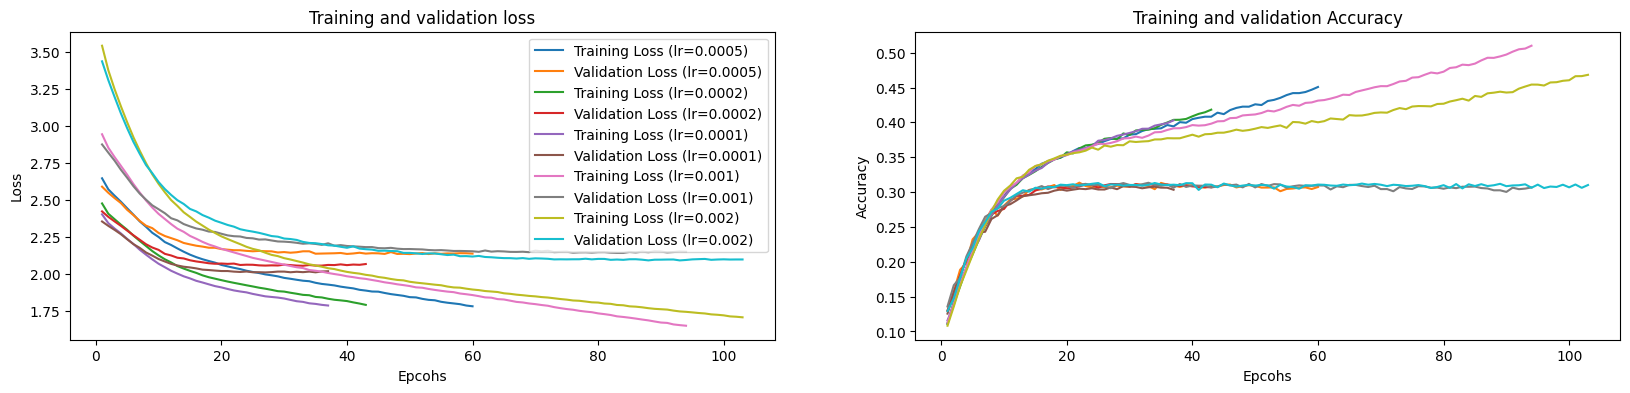

In [ ]:
# L2 regularization with different rates
regs = [0.0005, 0.0002, 0.0001, 0.001, 0.002]
fig, (ax1,ax2) = plt.subplots(1, 2)
for reg in regs:
    model = keras.Sequential()
    model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_rg1 = model.fit(train_images_n, train_labels_n,
                    epochs=500, batch_size=512, verbose=0,
                    validation_split=0.3, callbacks=callbacks)
    epochs = range(1, len(history_rg1.history["loss"]) + 1)
    print('\n Regs : ', reg)
    print('\n Training Accuracy: ', np.mean(history_rg1.history['accuracy']))
    print('\n Training Loss: ', np.mean(history_rg1.history['loss']))
    print('\n Validation Accuracy: ', np.median(history_rg1.history['val_accuracy']))
    print('\n Validation Loss: ', np.median(history_rg1.history['val_loss']))
  # plot the training and validation accuracy
    ax1.plot(epochs, history_rg1.history['loss'], label='Training Loss (lr={})'.format(reg))
    ax1.plot(epochs, history_rg1.history['val_loss'], label='Validation Loss (lr={})'.format(reg))
    ax2.plot(epochs, history_rg1.history['accuracy'], label='Training Accuracy (lr={})'.format(reg))
    ax2.plot(epochs, history_rg1.history['val_accuracy'], label='Validation Accuracy (lr={})'.format(reg))
# set the title and labels
# ax1.plot(epochs, history.history['val_loss'], label='OG Validation Loss')
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend(loc="upper right")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
# ax2.legend(loc="lower left")
plt.show();

Retraining a model from scratch

In [ ]:
# for test accuracy
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
              filepath="normal.keras",
              save_best_only=True,
              monitor="loss"),
              keras.callbacks.EarlyStopping(monitor="loss", 
              mode="min", 
              patience=7)]
history_n = model.fit(train_images_n, train_labels_n,
                    epochs=100, batch_size=512, verbose=0, callbacks=callbacks)
results = model.evaluate(test_images_n, test_labels_n)
print('\n Training Accuracy: ', np.mean(history_n.history['accuracy']))
print('\n Training Loss: ', np.mean(history_n.history['loss']))
print('\n Testing Results: ', results)

4/4 [==============================] - 0s 5ms/step - loss: 2.0166 - accuracy: 0.3250

 Training Accuracy:  0.3726362730562687

 Training Loss:  2.0209492433071135

 Testing Results:  [2.016632080078125, 0.32499998807907104]


# Using CNN


 Training Accuracy:  0.4881295679909427

 Training Loss:  1.478970236894561

 Validation Accuracy:  0.487140953540802

 Validation Loss:  1.4940900802612305


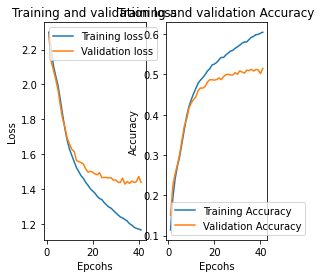

In [ ]:
# Without any regularization, is CNN going to improve model performance?
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_initial.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.01,
                  mode="min", 
                  restore_best_weights=True,
                  patience=7)]
history_cnn = model.fit(train_new, train_labels_n,
                    epochs=500, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_split=0.3, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

Observations: Model has started to generalize now and much better accuracy than fully connected one


 Training Accuracy:  0.5728257751983145

 Training Loss:  1.2141876583514006

 Validation Accuracy:  0.5850589871406555

 Validation Loss:  1.2687851190567017


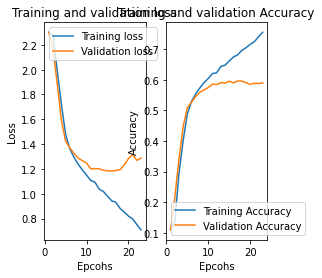

In [ ]:
# Let's add more layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_mn.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.0001,
                  mode="min", 
                  restore_best_weights=True,
                  patience=7)]
history_cnn = model.fit(train_new, train_labels_n,
                    epochs=500, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_split=0.3, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

Observations: Accuracy has improved and alos training loss is now reducing below 1 and val_loss also decreased compared to before


 Training Accuracy:  0.1121429397414128

 Training Loss:  2.304396132628123

 Validation Accuracy:  0.10932976752519608

 Validation Loss:  2.301698923110962


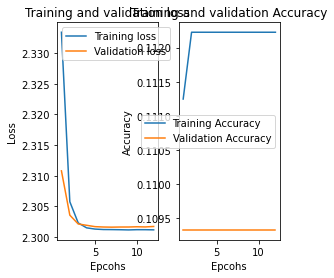

In [ ]:
# Let's add regularization to decrease loss
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.0001), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_reg.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.0001,
                  mode="min", 
                  restore_best_weights=True,
                  patience=7)]
history_cnn = model.fit(train_new, train_labels_n,
                    epochs=500, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_split=0.3, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

Observations: Regularization didn't help


 Training Accuracy:  0.1121271877334668

 Training Loss:  2.3012987283559947

 Validation Accuracy:  0.10932976752519608

 Validation Loss:  2.301682472229004


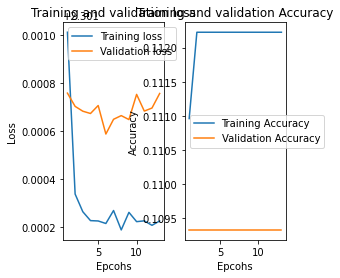

In [ ]:
# Let's add dropout to decrease loss
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_dr.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.0001,
                  mode="min", 
                  restore_best_weights=True,
                  patience=7)]
history_cnn = model.fit(train_new, train_labels_n,
                    epochs=500, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_split=0.3, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

Observations: Dropout also doesn't look good. Lets' try both.


 Training Accuracy:  0.5462384692540294

 Training Loss:  1.2952192974717993

 Validation Accuracy:  0.6150912940502167

 Validation Loss:  1.1258842945098877


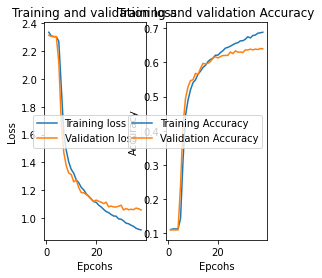

In [ ]:
# Let's add dropout and reg to decrease loss
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_regdr.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.0001,
                  mode="min", 
                  restore_best_weights=True,
                  patience=7)]
history_cnn = model.fit(train_new, train_labels_n,
                    epochs=500, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_split=0.3, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

Observations: Improved accuracy


 Training Accuracy:  0.5625046023300716

 Training Loss:  1.2410611152648925

 Validation Accuracy:  0.619182825088501

 Validation Loss:  1.106417179107666


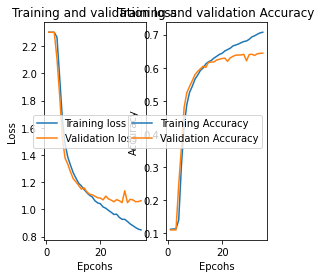

In [ ]:
# Let's remove 512
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_regdr1.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.0001,
                  mode="min", 
                  restore_best_weights=True,
                  patience=7)]
history_cnn = model.fit(train_new, train_labels_n,
                    epochs=500, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_split=0.3, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

Observations: Training and validation accuracy have definitely improved


 Training Accuracy:  0.11025622735420863

 Training Loss:  2.3012830018997192

 Validation Accuracy:  0.11339345574378967

 Validation Loss:  2.3016680479049683


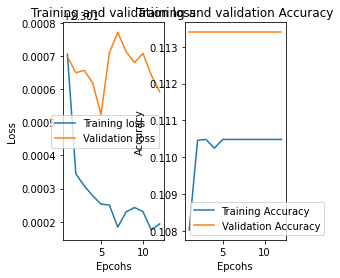

In [ ]:
# Let's do data augmentation
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
from keras.preprocessing.image import ImageDataGenerator
# Set up data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.3)
# Set up the ImageDataGenerator for the training dataset
train_generator = datagen.flow(
    x=train_new,
    y=train_labels_n,
    batch_size=128,
    subset='training',
    shuffle=True,
    seed=42)
# Set up the ImageDataGenerator for the validation dataset
val_generator = datagen.flow(
    x=train_new,
    y=train_labels_n,
    batch_size=128,
    subset='validation',
    shuffle=True,
    seed=42)
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_dag.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.0001,
                  mode="min", 
                  restore_best_weights=True,
                  patience=7)]
history_cnn = model.fit(train_generator,
                    epochs=500, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_data=val_generator, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

Observations: DataAugmentation didnt help


 Training Accuracy:  0.586827264197411

 Training Loss:  1.1875106673086844

 Validation Accuracy:  0.5892339944839478

 Validation Loss:  1.2085551023483276


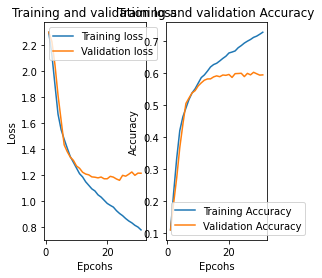

In [ ]:
# Let's try batchnormalization
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.1))
# model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_regdr1.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.0001,
                  mode="min", 
                  restore_best_weights=True,
                  patience=7)]
history_cnn = model.fit(train_new, train_labels_n,
                    epochs=500, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_split=0.3, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

Observations: BatchNormalization didnt help

# Final CNN Model


 Training Accuracy:  0.5966845970404776

 Training Loss:  1.1530594872800928

 Validation Accuracy:  0.6271710097789764

 Validation Loss:  1.0646606087684631


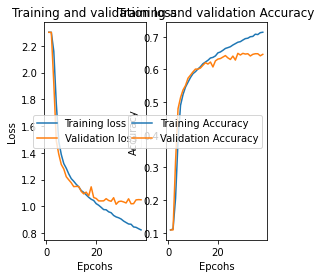

In [ ]:
# Let's train final one
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Pre-processing
train_new = train_images_n.reshape((train_images_n.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_final_vl.keras",
                save_best_only=True,
                monitor="val_loss"),
              keras.callbacks.EarlyStopping(
                  monitor="val_loss", 
                  min_delta = 0.0001,
                  mode="min", 
                  restore_best_weights=True,
                  patience=10)]
history_cnn = model.fit(train_new, train_labels_n,
                    epochs=100, batch_size=512, verbose=0, use_multiprocessing=True,
                    validation_split=0.1, callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
print('\n Validation Accuracy: ', np.median(history_cnn.history['val_accuracy']))
print('\n Validation Loss: ', np.median(history_cnn.history['val_loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.plot(epochs, history_cnn.history["val_loss"], label="Validation loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epcohs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs, history_cnn.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and validation Accuracy")
ax2.set(xlabel='Epcohs', ylabel='Accuracy')
ax2.legend()
plt.show();

In [ ]:
# Let's test on our 0.001 test data we kept aside in start
# test_images_new = train_images.numpy() - Not needed now, but might need when testing
# test_labels_n = train_labels.numpy() - Not needed now, but might need when testing
test_images_new = test_images_n.reshape((test_images_n.shape[0], 28, 28, 1))
# test_images_new = test_images_new.astype("float32") / 255 - Not needed now, but might need when testing
results = model.evaluate(test_images_new, test_labels_n)
print('\n Testing Results: ', results)

4/4 [==============================] - 0s 5ms/step - loss: 0.9899 - accuracy: 0.6583

 Testing Results:  [0.9898948073387146, 0.6583333611488342]


In [ ]:
# let's test on mnist data
from tensorflow.keras.datasets import mnist
(_,_), (x_test, y_test) = mnist.load_data()
x_test_n = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_test_n = x_test_n.astype("float32") / 255
results_mnist = model.evaluate(x_test_n, y_test)
print('\n Testing Results: ', results_mnist)

313/313 [==============================] - 1s 4ms/step - loss: 1.0712 - accuracy: 0.6825

 Testing Results:  [1.0711535215377808, 0.6825000047683716]



 Training Accuracy:  0.6509353390336037

 Training Loss:  1.0018069994449617


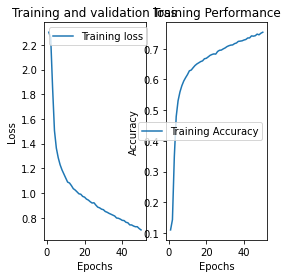

In [ ]:
# Train on entire training data and save our model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Pre-processing
train_new = train_images_arr.reshape((train_images_arr.shape[0], 28, 28, 1))
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
                filepath="cnn_final.keras",
                save_best_only=True,
                monitor="loss")]
history_cnn = model.fit(train_new, train_labels_arr,
                    epochs=50, batch_size=512, verbose=0, use_multiprocessing=True,
                    callbacks=callbacks)
loss_values = history_cnn.history["loss"]
print('\n Training Accuracy: ', np.mean(history_cnn.history['accuracy']))
print('\n Training Loss: ', np.mean(history_cnn.history['loss']))
fig, (ax1,ax2) = plt.subplots(1, 2)
epochs = range(1, len(loss_values) + 1)
ax1.plot(epochs, history_cnn.history["loss"], label="Training loss")
ax1.set_title("Training and validation loss")
ax1.set(xlabel='Epochs', ylabel='Loss')
ax1.legend()
ax2.plot(epochs, history_cnn.history["accuracy"], label="Training Accuracy")
ax2.set_title("Training Performance")
ax2.set(xlabel='Epochs', ylabel='Accuracy')
ax2.legend()
plt.show();

In [ ]:
# Let's test on our 0.001 test data we kept aside in start
# test_images_new = train_images.numpy() - Not needed now, but might need when testing
# test_labels_n = train_labels.numpy() - Not needed now, but might need when testing
test_images_new = test_images_n.reshape((test_images_n.shape[0], 28, 28, 1))
# test_images_new = test_images_new.astype("float32") / 255 - Not needed now, but might need when testing
results = model.evaluate(test_images_new, test_labels_n)
print('\n Testing Results: ', results)
results_mnist = model.evaluate(x_test_n, y_test)
print('\n Testing Results: ', results_mnist)

4/4 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.8750

 Testing Results:  [0.4630125164985657, 0.875]
313/313 [==============================] - 1s 4ms/step - loss: 0.9968 - accuracy: 0.7009

 Testing Results:  [0.996799886226654, 0.7009000182151794]


In [ ]:
# For testing
import pickle
from google.colab import files
files.upload()
!unzip -qq '636_project1.zip'
test_images = pickle.load(open('636_project1/636_project1_train_images', 'rb')) 
test_labels = pickle.load(open('636_project1/636_project1_train_labels', 'rb')) 
final_model = keras.models.load_model("cnn_final.keras") # Load our model
test_images_new = test_images.numpy() 
test_labels_n = test_labels.numpy()
test_images_new = test_images_n.reshape((test_images_n.shape[0], 28, 28, 1))
test_images_new = test_images_new.astype("float32") / 255 
results = final_model.evaluate(test_images_new, test_labels_n)
print('\n Testing Results: ', results)